**Partial Dependencies for Antisemitic Incident Rate per Jewish pop**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.inspection import PartialDependenceDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance

In [3]:
df = pd.read_csv("data_pd.csv")

In [5]:
df.columns

Index(['Unnamed: 0', 'STATEFP', 'COUNTYF', 'COUNTYN', 'GEOID', 'GEOIDFQ',
       'NAME', 'NAMELSA', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP',
       'METDIVF', 'FUNCSTA', 'ALAND', 'AWATER', 'INTPTLA', 'INTPTLO', 'POP',
       'rrl_rbn', 'unmply_', 'groups', 'grps_rt', 'poverty', 'college',
       'white', 'per_gop', 'rlgs_rt', 'povrty2', 'rrl_rb2', 'incdnts',
       'jwsh_pp', 'incdnt_', 'pp_dnst', 'incd___', 'residls', 'localI',
       'local_p', 'cluster', 'bsln_rt', 'expctd_', 'logE', 'conty_d',
       'RR_mean', 'RR_lcl', 'RR_ucl', 'RR_flag',
       'Median_Household_Income_2022', 'county_id', 'log_RRmean',
       'RR_lcl_test1', 'RR_ucl_test1', 'RR_flag_test1', 'RR_lcl_test2',
       'RR_ucl_test2', 'RR_flag_test2', 'RR_lcl_test3', 'RR_ucl_test3',
       'RR_flag_test3', 'RR_mean_t3', 'log_RRmean3', 'jewish_prop',
       'percent_targeted', 'college_prop', 'poverty_prop',
       'rural_urban_continuum', 'college_s', 'white_s', 'per_gop_s',
       'poverty_s', 'popdens_s', 'in

In [ ]:
# Smooth the incident rates using Bayesian methods, makes partial dependencies easier to observe
global_mean = 0.003826387 * 1000

alpha = df["jwsh_pp"].median()
w = df["jwsh_pp"] / (df["jwsh_pp"] + alpha)

df["rate_smoothed"] = w * df["incdnt_"] + (1 - w) * global_mean

In [58]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,STATEFP,COUNTYF,COUNTYN,GEOID,GEOIDFQ,NAME,NAMELSA,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVF,FUNCSTA,ALAND,AWATER,INTPTLA,INTPTLO,POP,rrl_rbn,unmply_,groups,grps_rt,poverty,college,white,per_gop,rlgs_rt,povrty2,rrl_rb2,incdnts,jwsh_pp,incdnt_,pp_dnst,incd___,residls,localI,local_p,cluster,bsln_rt,expctd_,logE,conty_d,RR_mean,RR_lcl,RR_ucl,RR_flag,Median_Household_Income_2022,county_id,log_RRmean,RR_lcl_test1,RR_ucl_test1,RR_flag_test1,RR_lcl_test2,RR_ucl_test2,RR_flag_test2,RR_lcl_test3,RR_ucl_test3,RR_flag_test3,RR_mean_t3,log_RRmean3,jewish_prop,percent_targeted,college_prop,poverty_prop,rural_urban_continuum,college_s,white_s,per_gop_s,poverty_s,popdens_s,income_s,RR_lcl_covar,RR_ucl_covar,RR_mean_covar,RR_flag_covar,RR_width_covar,rate_smoothed
0,1,1,1,161526,1001,0500000US01001,Autauga,Autauga County,06,H1,G4020,388.0,33860.0,NaN,A,1539631460,25677536,32.532237,-86.646439,58809,2,2.2,0,0.000000,11.7,28.3,0.713632,0.726641,51.410004,11.7,2,0,321,0.000000,38.196803,0.000000,-0.380044,-0.011262,0.923095,NaN,0.003826,1.228270,0.205607,1,0.510309,0.132309,1.960544,NaN,70148,1,-0.672740,0.136164,2.000353,NaN,0.135326,2.002570,NaN,0.135248,2.002319,Informative_NA,0.521426,-0.651188,0.005458,NaN,0.283,0.117,2,0.413073,-0.177223,0.365135,-0.505984,0.411373,0.432790,0.150116,1.844617,0.527156,Informative_NA,1.694501,0.000902
1,2,1,3,161527,1003,0500000US01003,Baldwin,Baldwin County,06,H1,G4020,380.0,19300.0,NaN,A,4117933903,1132678359,30.659218,-87.746067,231768,3,2.3,2,0.862932,10.0,32.8,0.822679,0.786467,53.639999,10.0,3,3,1111,2.700270,56.282594,1.294398,-0.465995,-0.009290,0.914141,NaN,0.003826,4.251116,1.447182,2,0.776932,0.318983,1.891437,NaN,71704,2,-0.252402,0.309261,1.881525,NaN,0.309394,1.885817,NaN,0.309264,1.885450,Informative_NA,0.763711,-0.269566,0.004794,0.333333,0.328,0.100,3,0.854237,0.371434,0.745377,-0.812561,0.655792,0.528630,0.357386,1.939153,0.832818,Informative_NA,1.581767,2.479652
2,3,1,5,161528,1005,0500000US01005,Barbour,Barbour County,06,H1,G4020,NaN,21640.0,NaN,A,2292160152,50523213,31.870253,-85.405103,25229,6,4.4,1,3.963693,25.5,11.5,0.447631,0.570179,68.689995,25.5,6,0,85,0.000000,11.006648,0.000000,-0.167955,0.028814,0.561781,NaN,0.003826,0.325243,-1.123183,3,0.510861,0.113719,2.286418,NaN,41151,3,-0.671658,0.113057,2.480074,NaN,0.111679,2.476883,NaN,0.111719,2.478411,Uninformative_NA,0.527246,-0.640088,0.003369,NaN,0.115,0.255,6,-1.233940,-1.515578,-0.629293,1.982702,-0.350829,-1.353253,0.072073,1.344848,0.312176,Uninformative_NA,1.272774,0.002059
3,4,1,7,161529,1007,0500000US01007,Bibb,Bibb County,06,H1,G4020,142.0,13820.0,NaN,A,1612188713,9572302,33.015893,-87.127148,22301,1,2.5,0,0.000000,19.4,11.5,0.737059,0.819392,48.840000,19.4,1,0,71,0.000000,13.832748,0.000000,0.283870,0.010110,0.740194,NaN,0.003826,0.271673,-1.303154,4,0.773703,0.173261,3.442536,NaN,54309,4,-0.256567,0.166582,3.462422,NaN,0.165782,3.474990,NaN,0.165639,3.474339,Uninformative_NA,0.759970,-0.274477,0.003184,NaN,0.115,0.194,1,-1.233940,-0.059356,0.954637,0.882630,-0.214655,-0.542798,0.103358,1.786862,0.430760,Uninformative_NA,1.683503,0.002228
4,5,1,9,161530,1009,0500000US01009,Blount,Blount County,06,H1,G4020,142.0,13820.0,NaN,A,1670296790,14822589,33.977357,-86.566440,59130,1,2.1,0,0.000000,12.8,15.6,0.854487,0.901796,57.320004,12.8,1,6,188,31.914894,35.400894,10.147133,4.670623,0.582703,0.455327,NaN,0.003826,0.719361,-0.329392,5,5.204827,2.216661,12.220055,High,60553,5,1.649587,2.244443,12.419649,High,2.259474,12.486284,High,2.258500,12.484091,High,5.310700,1.669724,0.003179,1.000000,0.156,0.128,1,-0.831991,0.531470,1.478377,-0.307611,0.363699,-0.158205,1.586362,9.594847,3.901616,High,8.008485,20.907243


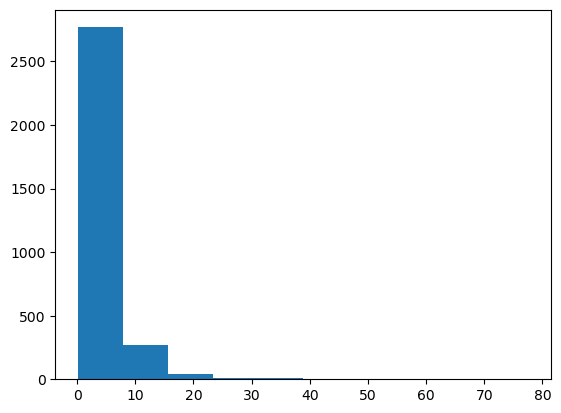

In [68]:
plt.hist(df['rate_smoothed'], bins=10)
plt.show()

In [ ]:
print(np.mean(df['rate_smoothed']))
print(np.mean(df['incdnt_']))
# Low data outliers have been shrunk

4.092279196552114
4.373441588140297


In [83]:
all_vars = ['college', 'white', 'per_gop', 'povrty2', 'rrl_rb2', 'pp_dnst', 'Median_Household_Income_2022']

In [84]:
X = df[all_vars]
y = df['rate_smoothed']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [86]:
antisemitism_rf = RandomForestRegressor()
antisemitism_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [87]:
y_pred = antisemitism_rf.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2:", r2)

RMSE: 5.34172767867544
R2: 0.006087593579741646


In [ ]:
cv_rmse = -cross_val_score(antisemitism_rf, X, y, cv=5, scoring="neg_root_mean_squared_error",n_jobs=-1)

print("CV RMSE:", cv_rmse.mean())

CV RMSE: 4.612172366150863


In [89]:
rf_param = {'n_estimators':[100,200,400,500,1000],
             'max_features':[2,4,6,8,10],
               'min_samples_leaf': [1,2,4]}

rf_tuned = GridSearchCV(RandomForestRegressor(), 
                        rf_param, 
                        scoring='neg_mean_squared_error', 
                        cv=5, n_jobs=-1)
rf_tuned.fit(X_train, y_train)
print(rf_tuned.best_estimator_)

RandomForestRegressor(max_features=2, min_samples_leaf=4, n_estimators=1000)


In [90]:
print(rf_tuned.best_estimator_)

RandomForestRegressor(max_features=2, min_samples_leaf=4, n_estimators=1000)


In [91]:
y_test_pred = rf_tuned.predict(X_test)

print('Root mean squared error: %.2f'
      % root_mean_squared_error(y_test, y_test_pred))

Root mean squared error: 5.18


In [92]:
vip = permutation_importance(rf_tuned, X_train, y_train,
                             n_repeats=30,
                             random_state=0)
var_names = X.columns
importances = vip.importances_mean
imp_std = vip.importances_std
indices = np.argsort(importances)[::-1]

<BarContainer object of 7 artists>

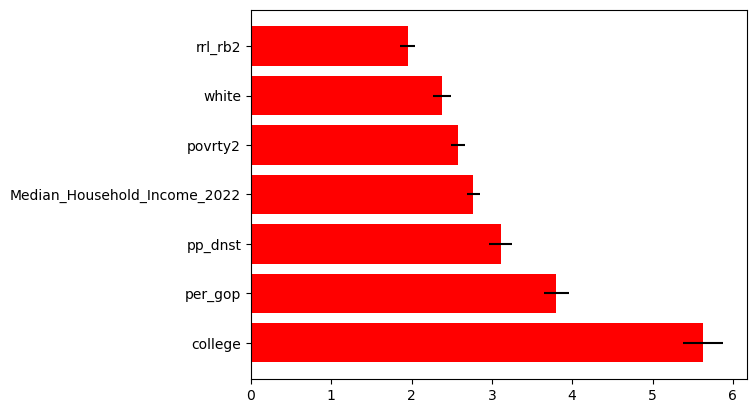

In [ ]:
# Plot feature importances
plt.barh(np.array(var_names)[indices], 
        importances[indices],
        xerr = imp_std[indices],
        color="r", align="center")

/opt/anaconda3/envs/thesis/lib/python3.13/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 4 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
/opt/anaconda3/envs/thesis/lib/python3.13/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 6 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


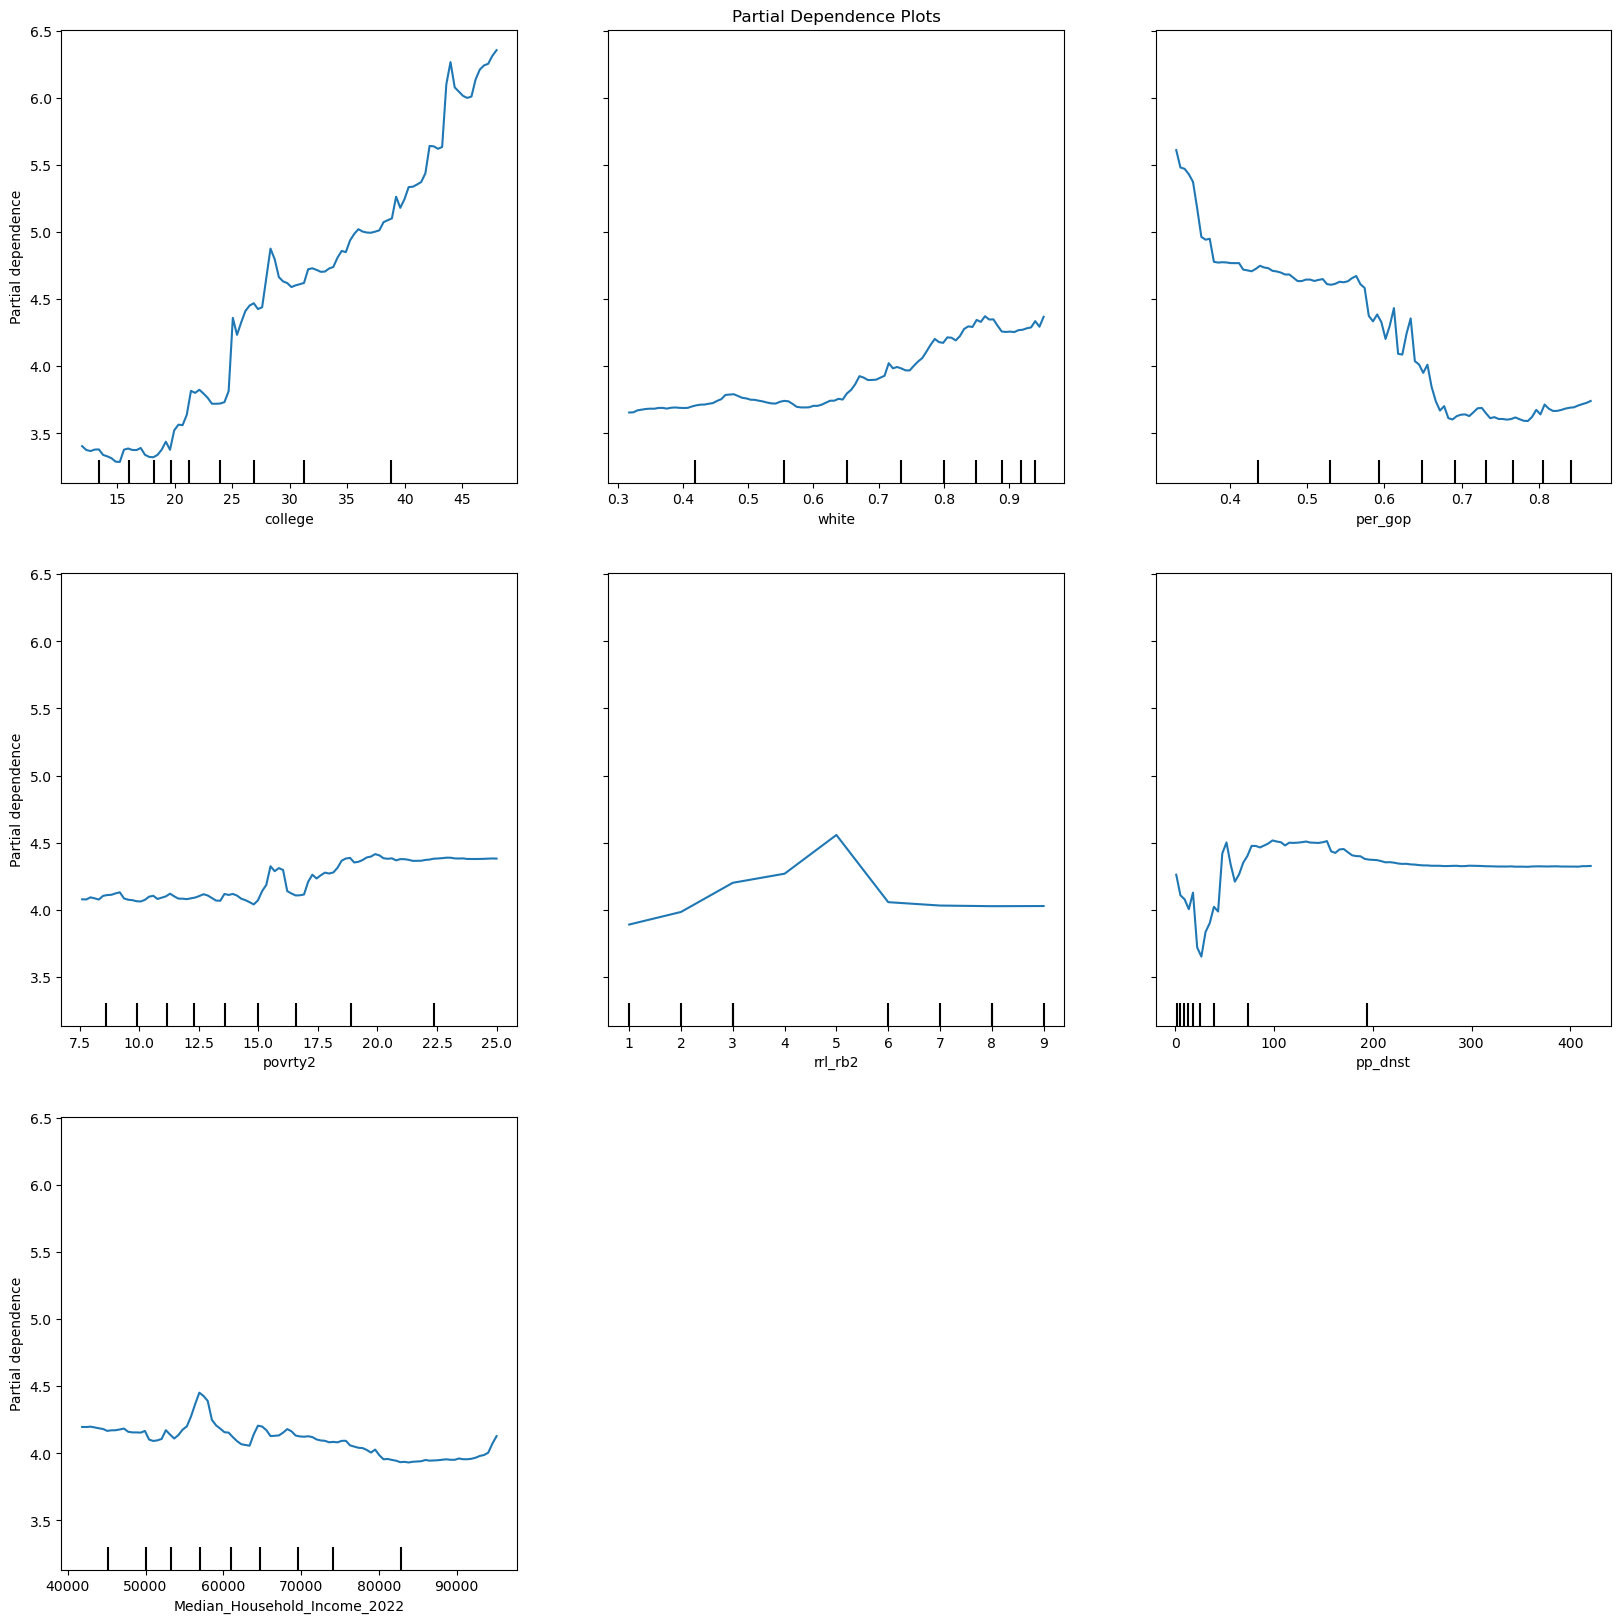

In [ ]:
# Generate partial dependency plots
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=rf_tuned.best_estimator_,
    X=X_test,
    features=all_vars,
    random_state=5,
    ax=ax,
)
plt.show()